In [ ]:
# %matplotlib notebook

In [343]:
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [344]:
plate_length = 60
alpha = 2
max_iter_time = 600
dx = 1; ###  assume dx = dy for ease of computation
delta_t = (delta_x ** 2)/(4 * alpha)
gamma = (alpha * delta_t) / (delta_x ** 2) 

## empty 3d matrix >> (t,x,y)
u = np.empty((max_iter_time,plate_length,plate_length))

## initial condition everywhere inside grid
u_initial = 0
u.fill(u_initial)

## boundary conditions
u_top = 60.0
u_left = 60.0
u_right = 60.0
u_bottom = 60.0

# # boundary condition : 1
# u[:,0,:] = u_bottom
# u[:,1:,plate_length-1] = u_right
# u[:,1:,0]= u_left
# u[:,plate_length-1,:] = u_top

# # boundary condition : 2

u_initial = np.random.uniform(low=28.5, high=55.5, size=(plate_length,plate_length))
u[0,:,:] = u_initial



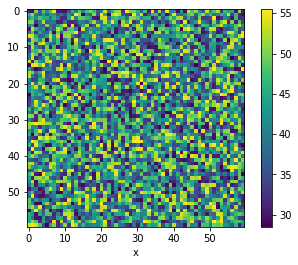

In [345]:
plt.imshow(u[0],interpolation = None)
plt.xlabel("x")
plt.colorbar()
plt.show()
## don't get confused, with matirix view (below) and actual x,y plot

In [346]:
def calc_u(u,gamma):
    for k in range(0,max_iter_time-1,1):
        for j in range(1,plate_length-1,dx): ## starting from 1 to handle 0-1 = -1 index error
            for i in range(1,plate_length-1,dx):
                
                u[k+1][i,j] = gamma*(u[k][i+1,j]+u[k][i-1,j]+u[k][i,j+1]+u[k][i,j-1]-4.0*u[k][i,j]) + u[k][i,j]
            
    return u 

MovieWriter ffmpeg unavailable; using Pillow instead.


Done!


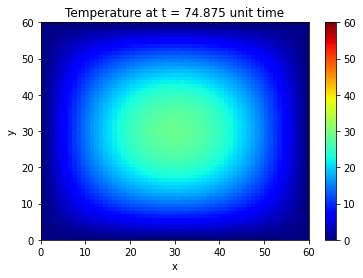

In [347]:
def plotheatmap(u_k, k,u_top):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh(u_k, cmap=plt.cm.jet, vmin=0, vmax=u_top)
    plt.colorbar()
    
    return plt


def animate(k):
    plotheatmap(u[k],k,u_top)
    
u = calc_u(u,gamma)

anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("heat_equation_solution.gif")

print("Done!")

In [ ]:
u = calc_u(u,gamma)
u

In [ ]:
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(projection='3d')

# ax.scatter3D(u[0],u[1],u[2],c = u[0], cmap = cm.coolwarm)
# ax.set_xlabel("$x$",c='b',fontsize = 20)
# ax.set_ylabel("$y$",c='b',fontsize = 20)
# ax.set_zlabel("$z$",c='b',fontsize = 20)

# plt.show()
